In [18]:
import pandas as pd
import numpy as np
import geopandas as gpd

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

In [19]:
paths=[r"C:\Users\rishi\ml_projects\climate\500_23\CO\response.tiff",
       r"C:\Users\rishi\ml_projects\climate\500_23\HCHO\response.tiff",
       r"C:\Users\rishi\ml_projects\climate\500_23\NO2\response.tiff",
       r"C:\Users\rishi\ml_projects\climate\500_23\O3\response.tiff",
       r"C:\Users\rishi\ml_projects\climate\500_23\SO2\response.tiff"]

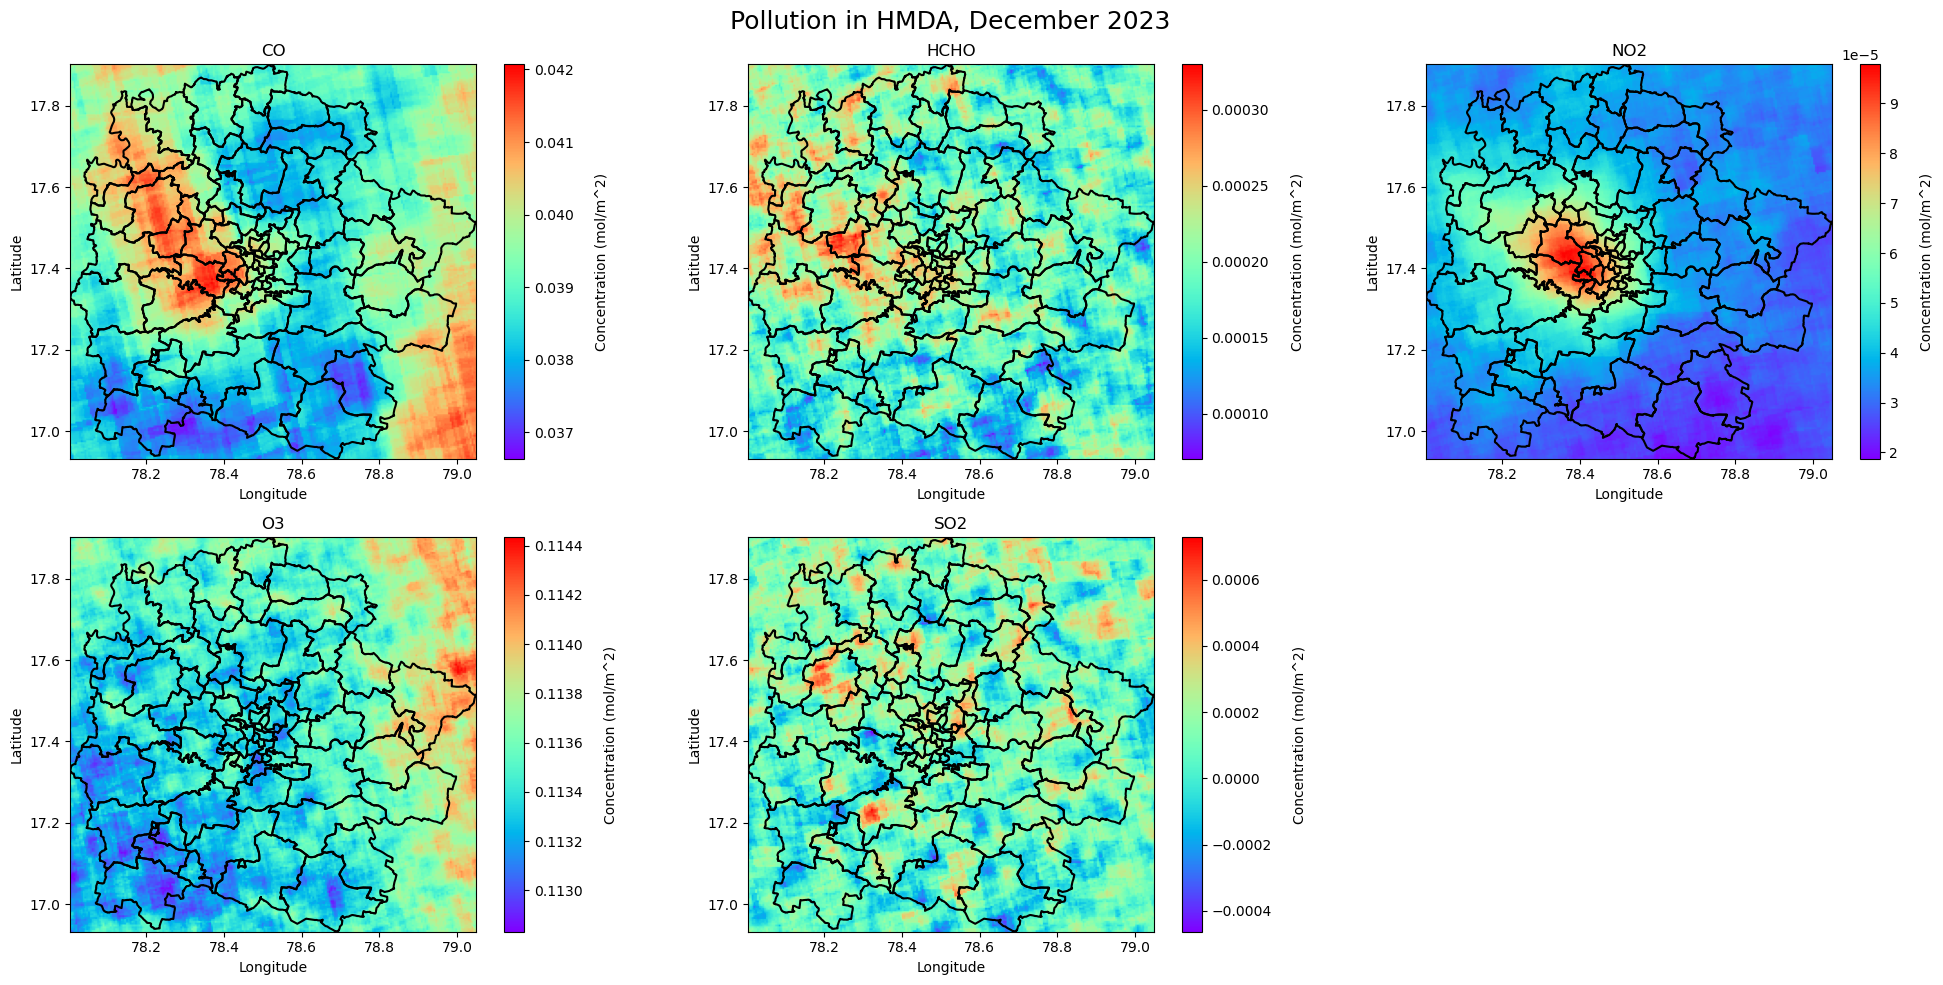

In [35]:
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)

# Initialize a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle('Pollution in HMDA, December 2023', fontsize=18)
for i, tif_file in enumerate(paths):
    with rasterio.open(tif_file) as dataset:
        # Determine the appropriate axis for each image
        row = i // 3
        col = i % 3
        ax = axes[row, col]

        m = tif_file.split(os.sep)
        show(dataset, ax=ax, cmap='rainbow')
        ax.set_title(f'{m[6]}')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        # Add a colorbar for each subplot
        cbar = fig.colorbar(ax.images[0], ax=ax, orientation='vertical', fraction=0.04, )
        cbar.set_label('Concentration (mol/m^2)', rotation=90, labelpad=15)
        # Plot the shapefile boundary on top of the image
        gdf.boundary.plot(ax=ax, edgecolor='black')
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()
